In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
data = pd.read_csv("bank_note_data.csv")
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [82]:
data["Class"].unique()

array([0, 1], dtype=int64)

In [83]:
data.isnull().sum()

Image.Var     0
Image.Skew    0
Image.Curt    0
Entropy       0
Class         0
dtype: int64

In [92]:
features = list(data.columns)[:-1]
features
target = list(data.columns)[-1]
target

'Class'

In [93]:
from sklearn.preprocessing import StandardScaler

data_norm = data.copy()
sc = StandardScaler()
data_norm[features] = sc.fit_transform(data[features])

In [94]:
data_norm

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


In [95]:
data

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# TSNE

In [96]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=500,n_components = 2)

In [97]:
x_tsne = tsne.fit_transform(data_norm[features])

In [98]:
x_tsne

array([[-28.819801, -25.779907],
       [-26.82279 , -29.37888 ],
       [ 37.071777, -29.899214],
       ...,
       [ 60.413616,  16.214188],
       [ 52.00146 ,  14.781543],
       [ 18.672264,  34.96175 ]], dtype=float32)

In [99]:
y = data[target]

## visualization

Text(0.5, 1.0, 'TSNE PLOT')

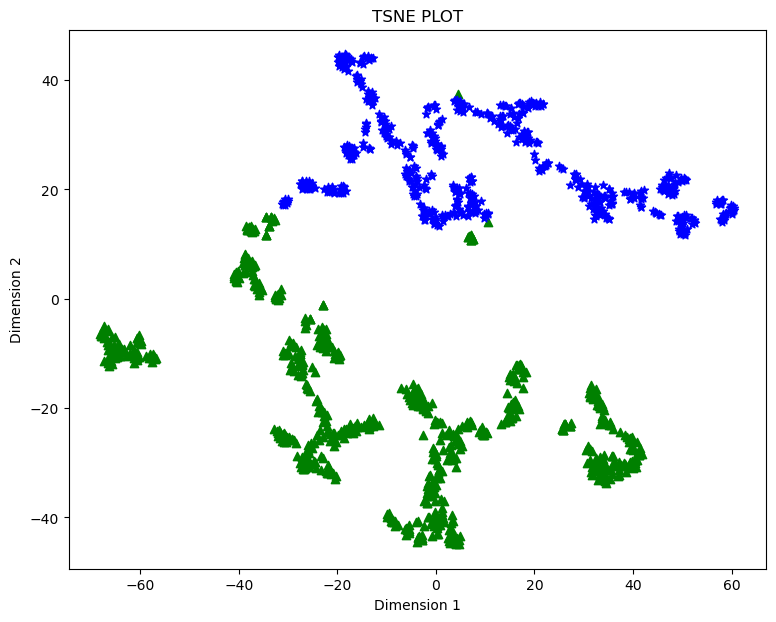

In [100]:
plt.figure(figsize = (9,7))
plt.scatter(x_tsne[np.where(y == 0),0], x_tsne[np.where(y == 0),1], color = "g", marker = "^")
plt.scatter(x_tsne[np.where(y == 1),0], x_tsne[np.where(y == 1),1], color = "b", marker = "*")

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("TSNE PLOT")